## Implementación de un modelo de deep learning

### Hilda Beltrán Acosta
### A01251916

## First Model

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras import optimizers

train_dir = "C:/Users/hilda/Downloads/archive (6)/tomato/train"
validation_dir = "C:/Users/hilda/Downloads/archive (6)/tomato/val"

train_datagen = ImageDataGenerator(1./255)

val_datagen = ImageDataGenerator(1./255)

train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 64,
							class_mode ='categorical')

val_generator = val_datagen.flow_from_directory(
							validation_dir,
							target_size = (150,150),
							batch_size = 64,
							class_mode= 'categorical')

model  =  Sequential([
                    Conv2D(32, kernel_size=3, padding='same', activation="relu", input_shape = (150, 150, 3)),
                    MaxPooling2D((2,2)),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(64, activation='relu'),
                    Dense(10, activation='softmax')])

model.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics=['accuracy'])

history = model.fit(train_generator, steps_per_epoch = 20, epochs = 30, validation_data = val_generator, validation_steps = 100)

Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


C:\Users\hilda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\preprocessing\image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/30
20/20 [==============================] - 58s 3s/step - loss: 1312.1179 - accuracy: 0.1148 - val_loss: 295.6432 - val_accuracy: 0.1007
Epoch 2/30
20/20 [==============================] - 45s 2s/step - loss: 120.4571 - accuracy: 0.1516 - val_loss: 42.1625 - val_accuracy: 0.1957
Epoch 3/30
20/20 [==============================] - 48s 2s/step - loss: 16.8954 - accuracy: 0.2852 - val_loss: 4.8244 - val_accuracy: 0.3422
Epoch 4/30
20/20 [==============================] - 44s 2s/step - loss: 3.8001 - accuracy: 0.3984 - val_loss: 3.5039 - val_accuracy: 0.3679
Epoch 5/30
20/20 [==============================] - 41s 2s/step - loss: 2.8152 - accuracy: 0.4141 - val_loss: 2.3311 - val_accuracy: 0.4837
Epoch 6/30
20/20 [==============================] - 41s 2s/step - loss: 2.2273 - accuracy: 0.4773 - val_loss: 2.2706 - val_accuracy: 0.4957
Epoch 7/30
20/20 [==============================] - 44s 2s/step - loss: 1.7956 - accuracy: 0.5484 - val_loss: 1.8919 - val_accuracy: 0.5226
Epoch 8/30


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

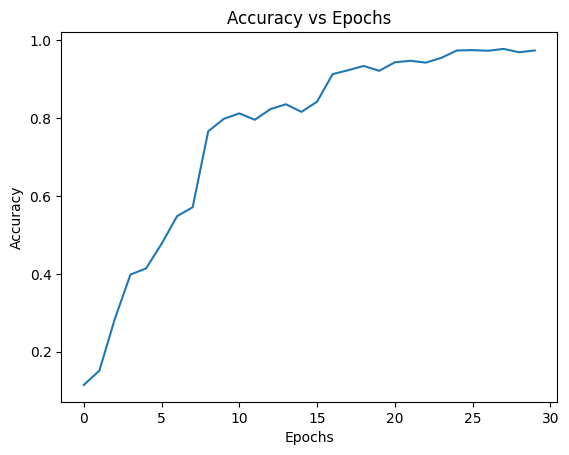

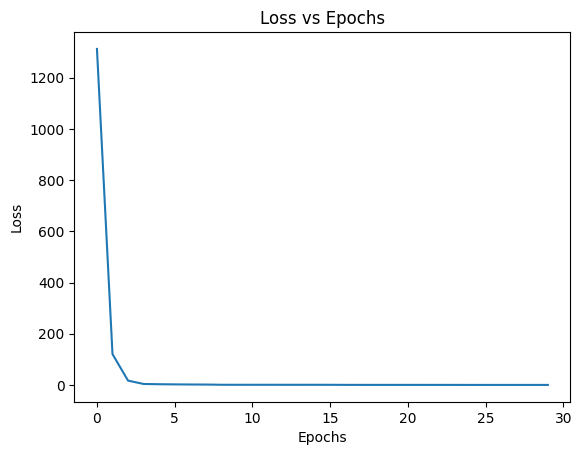

In [5]:
frame = pd.DataFrame(history.history)

acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

In [6]:
model.save_weights('weights_1.h5')

## Second Model
### Fixes Overfitting using Dropout Technique

In [14]:
from tensorflow.python.keras.layers import Dropout
model2  =  Sequential([
                    Conv2D(32, kernel_size=3, padding='same', activation="relu", input_shape = (150, 150, 3)),
                    MaxPooling2D((2,2)),
                    Conv2D(16, kernel_size=3, activation="relu"),
                    MaxPooling2D((2,2)),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dropout(0.5),
                    Dense(10, activation='softmax')])

model2.compile(optimizer= "rmsprop", loss = "categorical_crossentropy", metrics=['accuracy'])

history2 = model2.fit(train_generator, steps_per_epoch = 20, epochs = 30, validation_data = val_generator, validation_steps = 100)

Epoch 1/30
20/20 [==============================] - 25s 1s/step - loss: 48.1728 - accuracy: 0.1719 - val_loss: 2.0306 - val_accuracy: 0.3048
Epoch 2/30
20/20 [==============================] - 24s 1s/step - loss: 2.3255 - accuracy: 0.2662 - val_loss: 1.9548 - val_accuracy: 0.3081
Epoch 3/30
20/20 [==============================] - 25s 1s/step - loss: 2.0104 - accuracy: 0.3094 - val_loss: 1.8428 - val_accuracy: 0.3801
Epoch 4/30
20/20 [==============================] - 24s 1s/step - loss: 2.1359 - accuracy: 0.2812 - val_loss: 1.9646 - val_accuracy: 0.3584
Epoch 5/30
20/20 [==============================] - 24s 1s/step - loss: 2.0395 - accuracy: 0.3406 - val_loss: 1.9538 - val_accuracy: 0.3378
Epoch 6/30
20/20 [==============================] - 25s 1s/step - loss: 2.8237 - accuracy: 0.2469 - val_loss: 1.7735 - val_accuracy: 0.3940
Epoch 7/30
20/20 [==============================] - 25s 1s/step - loss: 1.9955 - accuracy: 0.3406 - val_loss: 1.7208 - val_accuracy: 0.4476
Epoch 8/30
20/20 [=

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

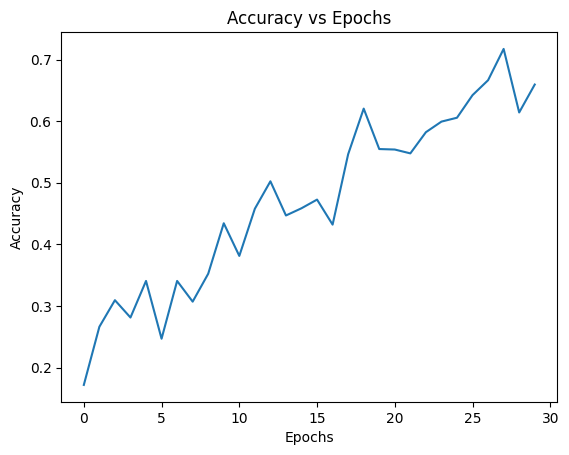

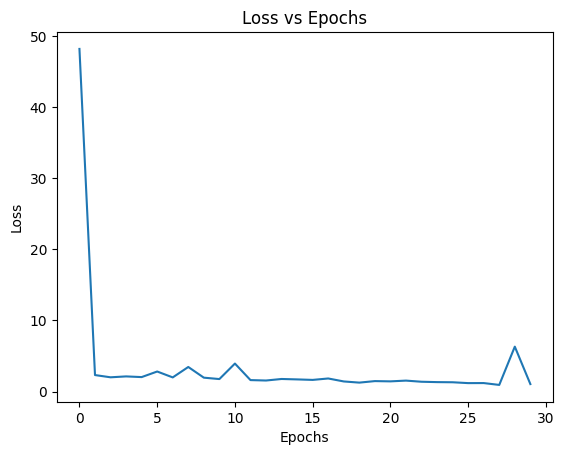

In [15]:
frame2 = pd.DataFrame(history2.history)

acc_plot2 = frame2.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot2.set(xlabel="Epochs", ylabel="Accuracy")

acc_plot2 = frame2.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot2.set(xlabel="Epochs", ylabel="Loss")

In [16]:
model2.save_weights('weights_2.h5')